Importing the libraries and dataset. Also taking a look at the dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

slidings = pd.read_csv('Data\slidings_training.csv')
slidings = slidings.drop(columns='Unnamed: 0',axis=1)
slidings.head()

,situation,location,risk,victims,deadly_victims,length,num_points,in_place,sliding,Rain
0,1,1,0,0,0,0,0,0,1,0.60
1,1,1,0,0,0,0,0,0,1,0.60
2,1,1,0,0,0,0,0,0,1,0.13
3,1,1,0,0,0,0,0,0,1,2.17
4,1,1,0,0,0,0,0,0,1,93.60


In [2]:
slidings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45931 entries, 0 to 45930
Data columns (total 10 columns):
situation         45931 non-null int64
location          45931 non-null int64
risk              45931 non-null int64
victims           45931 non-null int64
deadly_victims    45931 non-null int64
length            45931 non-null int64
num_points        45931 non-null int64
in_place          45931 non-null int64
sliding           45931 non-null int64
Rain              45931 non-null float64
dtypes: float64(1), int64(9)
memory usage: 3.5 MB


In this notebook we will be evaluating the RandomForestClassifier algorithm. Random state will be set to 2. We will start with the default hyperparameters.

In [3]:
random_state = 2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


X = slidings.drop(columns={'sliding'},axis=1)
y= slidings['sliding']

model = RandomForestClassifier()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=random_state)

model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Evaluating the model with the default hyperparameters.

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      6068
           1       0.84      0.71      0.77      3119

    accuracy                           0.86      9187
   macro avg       0.85      0.82      0.83      9187
weighted avg       0.85      0.86      0.85      9187



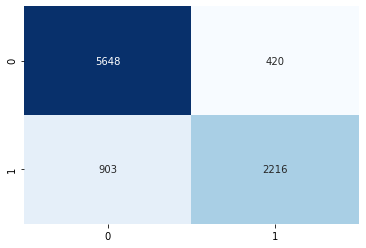

In [4]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict(X_test)
print(classification_report(y_test,predictions))
cfm = confusion_matrix(y_test,predictions)
sns.heatmap(cfm, cbar=False, annot=True, cmap='Blues', fmt='d')

We will now variate the maximum depth and the number of estimators, and compare the precision of the model guessing there was a sliding(1) and the accuracy.

The maximum precision for  2  depth found was  1.000  with  5  estimators.
The maximum accuracy for  2  depth found was  0.868  with  10  estimators.

The maximum precision for  3  depth found was  1.000  with  5  estimators.
The maximum accuracy for  3  depth found was  0.868  with  5  estimators.

The maximum precision for  4  depth found was  1.000  with  5  estimators.
The maximum accuracy for  4  depth found was  0.868  with  5  estimators.

The maximum precision for  5  depth found was  1.000  with  5  estimators.
The maximum accuracy for  5  depth found was  0.869  with  10  estimators.

The maximum precision for  6  depth found was  0.999  with  15  estimators.
The maximum accuracy for  6  depth found was  0.869  with  15  estimators.

The maximum precision for  7  depth found was  0.980  with  5  estimators.
The maximum accuracy for  7  depth found was  0.871  with  10  estimators.



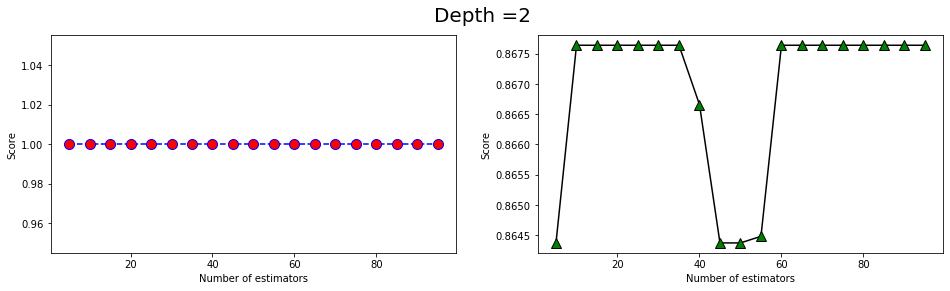

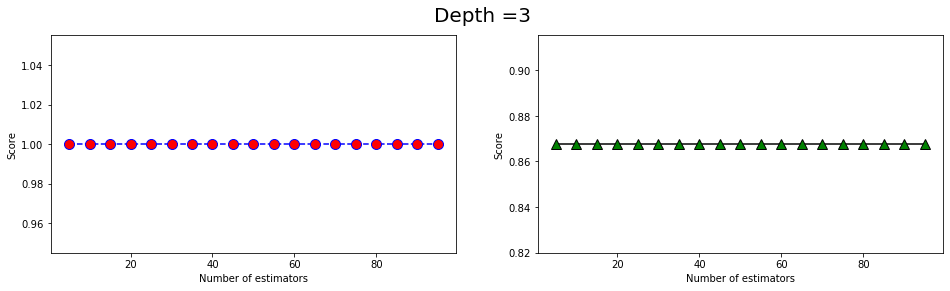

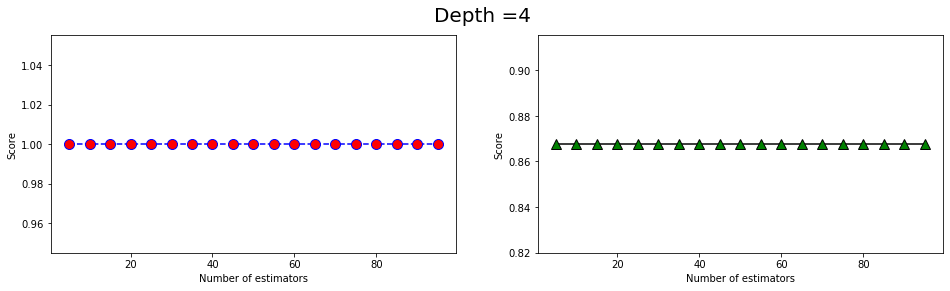

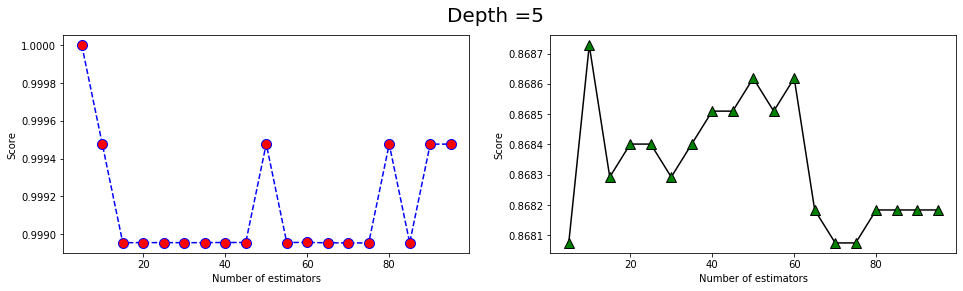

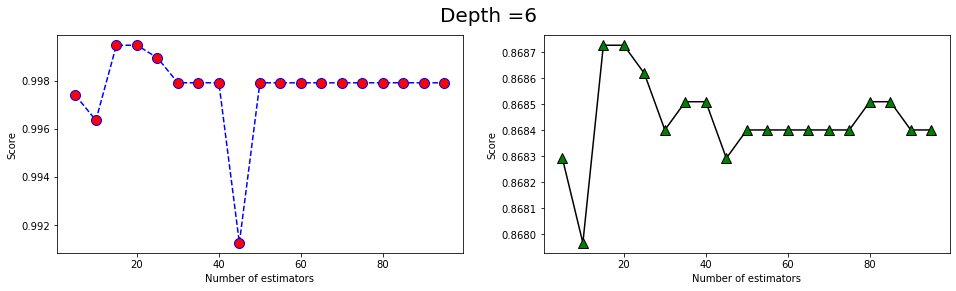

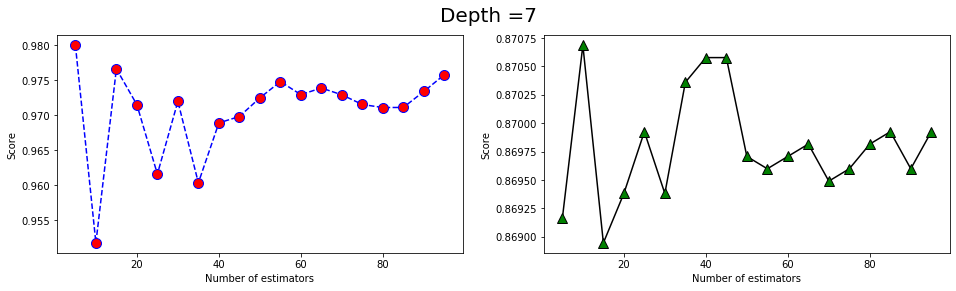

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, accuracy_score

for depth in range (2,8):
    precision = []
    accuracy = []
    for estimators in range(5,100,5):
        model = RandomForestClassifier(n_estimators=estimators,max_depth=depth,random_state=random_state)
        model.fit(X_train,y_train)
        predictions = model.predict(X_test)
        precision.append(precision_score(y_test,predictions))
        accuracy.append(accuracy_score(y_test,predictions))
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,4))
    fig.suptitle('Depth ='+str(depth),fontsize=20)
    ax1.plot(range(5,100,5),precision,label='Precision',color='blue',linestyle='dashed',marker='o', markerfacecolor='red',markersize=10,)
    ax2.plot(range(5,100,5),accuracy,label='Accuracy',color='black',marker='^', markerfacecolor='green',markersize=10)
    ax1.set(xlabel='Number of estimators', ylabel='Score')
    ax2.set(xlabel='Number of estimators', ylabel='Score')
    ax1.legend()
    ax2.legend()
    print('The maximum precision for ',depth,' depth found was ','%.3f' %max(precision),' with ',precision.index(max(precision))*5+5,' estimators.')
    print('The maximum accuracy for ',depth,' depth found was ','%.3f' %max(accuracy),' with ',accuracy.index(max(accuracy))*5+5,' estimators.\n')
    



The depth variation for both the precision and accuracy is only on the third decimal case till depth 5, and at depth 5 the best precision and accuracy coincide on the number of estimators, so we'll go on with depth = 5 and estimators = 10, and take a more in-depth look with these hyperparameters.

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      6068
           1       1.00      0.61      0.76      3119

    accuracy                           0.87      9187
   macro avg       0.92      0.81      0.84      9187
weighted avg       0.89      0.87      0.86      9187



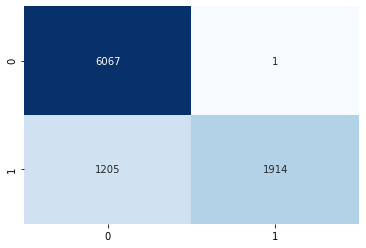

In [6]:
depth = 5
estimators = 10
model = RandomForestClassifier(n_estimators=estimators,max_depth=depth,random_state=random_state)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))
cfm = confusion_matrix(y_test,predictions)
sns.heatmap(cfm, cbar=False, annot=True, cmap='Blues', fmt='d')

In [7]:
model.score(X,y)

0.8745945004463217

Validating with cross validation.

In [8]:
from sklearn.model_selection import cross_val_score


scores = cross_val_score(model, X, y, cv=10)
scores

array([0.8602525 , 0.94927063, 0.82516874, 0.89244503, 0.80949271,
       0.99368604, 0.85586762, 0.7439582 , 0.95318964, 0.85586762])

In [9]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.87 (+/- 0.14)


In [10]:

scores_precision = cross_val_score(model, X, y, cv=10, scoring='precision')
scores_precision

array([1.        , 0.99922179, 1.        , 1.        , 1.        ,
       0.99932841, 1.        , 1.        , 0.97445255, 1.        ])

In [11]:
print("Precision: %0.2f (+/- %0.2f)" % (scores_precision.mean(), scores_precision.std() * 2))

Precision: 1.00 (+/- 0.02)


Taking a look at the Roc Curve and the area under the curve.

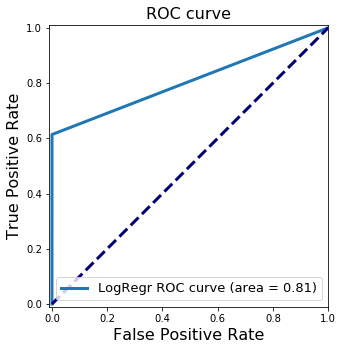

In [12]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(5,10))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.gca().set_aspect('equal')
plt.show()

Finally we will at a look at how each feature affects our model.

In [13]:
importances = model.feature_importances_
for i in range(X.shape[1]):
    print( X.columns[i],"%.4f" % importances[i])

situation 0.8157
location 0.0143
risk 0.0400
victims 0.0006
deadly_victims 0.0002
length 0.0197
num_points 0.0146
in_place 0.0594
Rain 0.0355


Unexpectedly, the situation feature, just a quick reminder: it states if the government considered their internal process (evaluation, installation of canvas, etc) finished or not, represents way too much for model, so the next thing we need to analyze is the same model without this feature.